In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

## Import dependencies

In [3]:
from IPython.display import display

from configs import config
from utils.data_viz_utils import create_average_metrics_df, visualize_fairness_metrics_for_prediction_metric

## Create average metrics files

In [4]:
STATE = config.DATASET_CONFIG['state']
YEAR = config.DATASET_CONFIG['year']
DATASET_NAME = f"Folktables_{STATE}_{YEAR}"

MODELS_NAMES = [model_config['model_name'] for model_config in config.MODELS_CONFIG]

In [5]:
models_average_results_dct = create_average_metrics_df(DATASET_NAME, MODELS_NAMES)

File with average metrics for LogisticRegression is created
File with average metrics for DecisionTreeClassifier is created
File with average metrics for RandomForestClassifier is created
File with average metrics for XGBClassifier is created
File with average metrics for KNeighborsClassifier is created


## Visualize average metrics

### Overall metrics visualizations

In [6]:
def overall_metric_comparison(prediction_metric_name, dataset_name, model_names, models_average_results_dct):
    comparison_df = pd.DataFrame(columns=('Dataset_Name', 'Metric_Name', 'Model_Name', 'Metric_Value'))
    for idx, model_name in enumerate(model_names):
        model_average_results_df = models_average_results_dct[model_name]
        comparison_df.loc[idx] = [dataset_name, prediction_metric_name, model_name, model_average_results_df['overall'].loc[prediction_metric_name]]

    return comparison_df.sort_values(by=['Metric_Value'], ascending=False, axis=0)

In [7]:
def display_all_overall_metrics(dataset_name, model_names, models_average_results_dct):
    overall_metrics = list(models_average_results_dct[list(models_average_results_dct.keys())[0]].index)

    for overall_metric in overall_metrics:
        comparison_df = overall_metric_comparison(overall_metric, dataset_name, model_names, models_average_results_dct)
        print('#' * 30, f' {overall_metric} Comparison ', '#' * 30)
        display(comparison_df)

In [75]:
display_all_overall_metrics(DATASET_NAME, MODELS_NAMES, models_average_results_dct)

##############################  TPR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
2,Folktables_GA_2018,TPR,RandomForestClassifier,0.875603
3,Folktables_GA_2018,TPR,XGBClassifier,0.867763
1,Folktables_GA_2018,TPR,DecisionTreeClassifier,0.854008
4,Folktables_GA_2018,TPR,KNeighborsClassifier,0.839912
0,Folktables_GA_2018,TPR,LogisticRegression,0.838336


##############################  TNR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
3,Folktables_GA_2018,TNR,XGBClassifier,0.805243
1,Folktables_GA_2018,TNR,DecisionTreeClassifier,0.798202
2,Folktables_GA_2018,TNR,RandomForestClassifier,0.795919
0,Folktables_GA_2018,TNR,LogisticRegression,0.786638
4,Folktables_GA_2018,TNR,KNeighborsClassifier,0.773521


##############################  PPV Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
3,Folktables_GA_2018,PPV,XGBClassifier,0.780142
2,Folktables_GA_2018,PPV,RandomForestClassifier,0.775836
1,Folktables_GA_2018,PPV,DecisionTreeClassifier,0.771821
0,Folktables_GA_2018,PPV,LogisticRegression,0.758631
4,Folktables_GA_2018,PPV,KNeighborsClassifier,0.751382


##############################  FNR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
0,Folktables_GA_2018,FNR,LogisticRegression,0.161664
4,Folktables_GA_2018,FNR,KNeighborsClassifier,0.160088
1,Folktables_GA_2018,FNR,DecisionTreeClassifier,0.145992
3,Folktables_GA_2018,FNR,XGBClassifier,0.132237
2,Folktables_GA_2018,FNR,RandomForestClassifier,0.124397


##############################  FPR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
4,Folktables_GA_2018,FPR,KNeighborsClassifier,0.226479
0,Folktables_GA_2018,FPR,LogisticRegression,0.213362
2,Folktables_GA_2018,FPR,RandomForestClassifier,0.204081
1,Folktables_GA_2018,FPR,DecisionTreeClassifier,0.201798
3,Folktables_GA_2018,FPR,XGBClassifier,0.194757


##############################  Accuracy Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
3,Folktables_GA_2018,Accuracy,XGBClassifier,0.832953
2,Folktables_GA_2018,Accuracy,RandomForestClassifier,0.831491
1,Folktables_GA_2018,Accuracy,DecisionTreeClassifier,0.822964
0,Folktables_GA_2018,Accuracy,LogisticRegression,0.809603
4,Folktables_GA_2018,Accuracy,KNeighborsClassifier,0.803332


##############################  F1 Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
2,Folktables_GA_2018,F1,RandomForestClassifier,0.822701
3,Folktables_GA_2018,F1,XGBClassifier,0.821613
1,Folktables_GA_2018,F1,DecisionTreeClassifier,0.810811
0,Folktables_GA_2018,F1,LogisticRegression,0.796486
4,Folktables_GA_2018,F1,KNeighborsClassifier,0.793183


##############################  Selection-Rate Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
2,Folktables_GA_2018,Selection-Rate,RandomForestClassifier,0.503917
4,Folktables_GA_2018,Selection-Rate,KNeighborsClassifier,0.501909
3,Folktables_GA_2018,Selection-Rate,XGBClassifier,0.493109
1,Folktables_GA_2018,Selection-Rate,DecisionTreeClassifier,0.491547
0,Folktables_GA_2018,Selection-Rate,LogisticRegression,0.491101


##############################  Positive-Rate Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
2,Folktables_GA_2018,Positive-Rate,RandomForestClassifier,1.128606
4,Folktables_GA_2018,Positive-Rate,KNeighborsClassifier,1.117824
3,Folktables_GA_2018,Positive-Rate,XGBClassifier,1.112351
1,Folktables_GA_2018,Positive-Rate,DecisionTreeClassifier,1.106580
0,Folktables_GA_2018,Positive-Rate,LogisticRegression,1.105063


### Metrics visualizations by groups

#### Accuracy

In [8]:
type(models_average_results_dct['DecisionTreeClassifier']['SEX_RAC1P_priv'].loc['Accuracy'])

numpy.float64

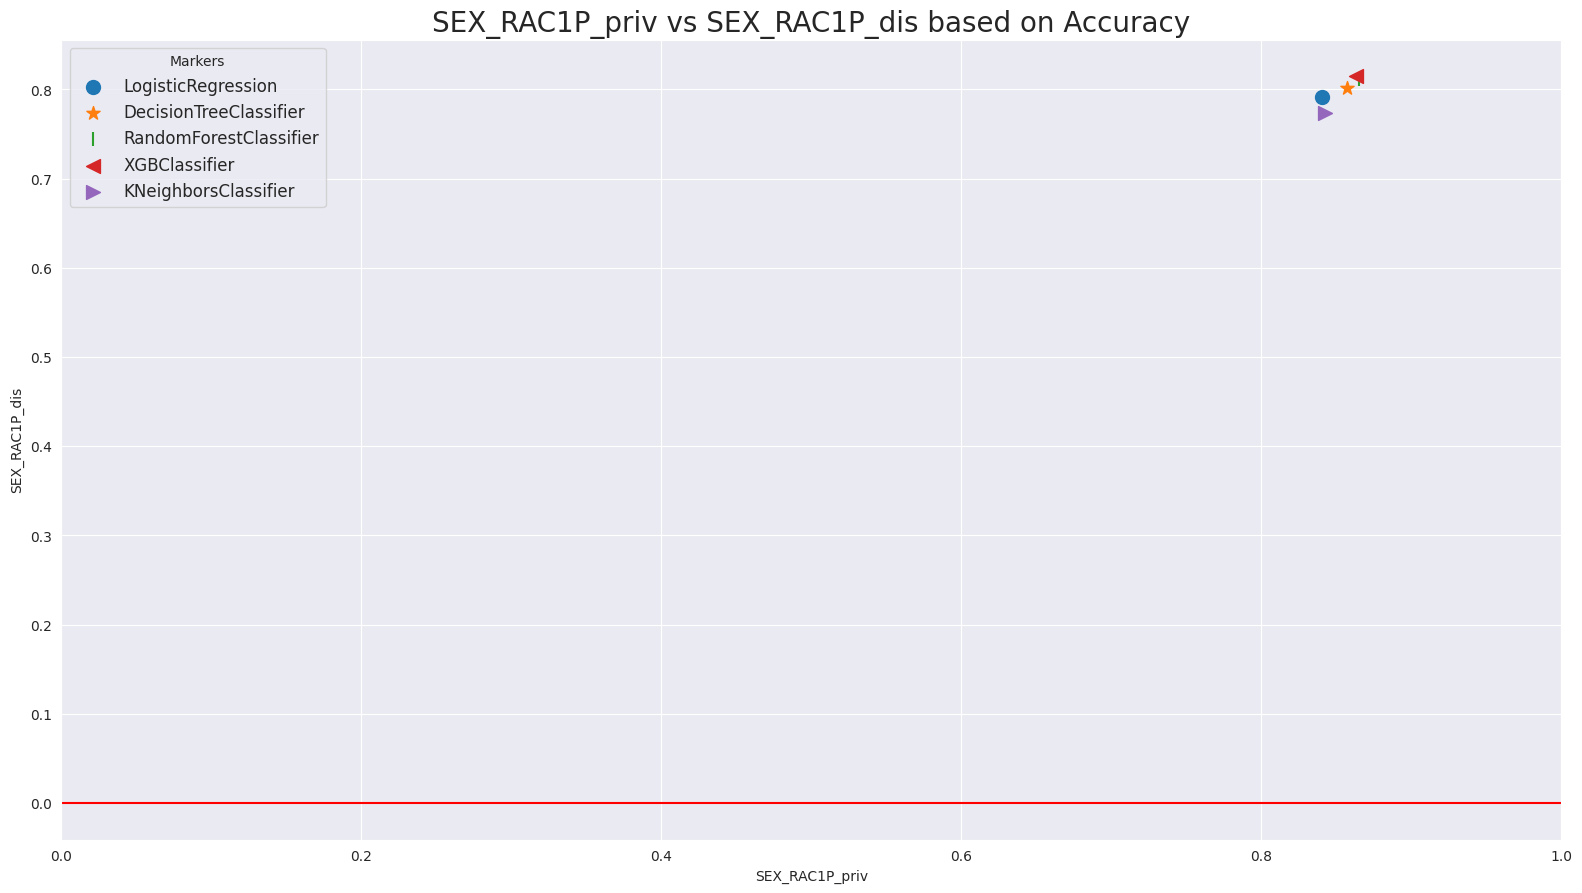

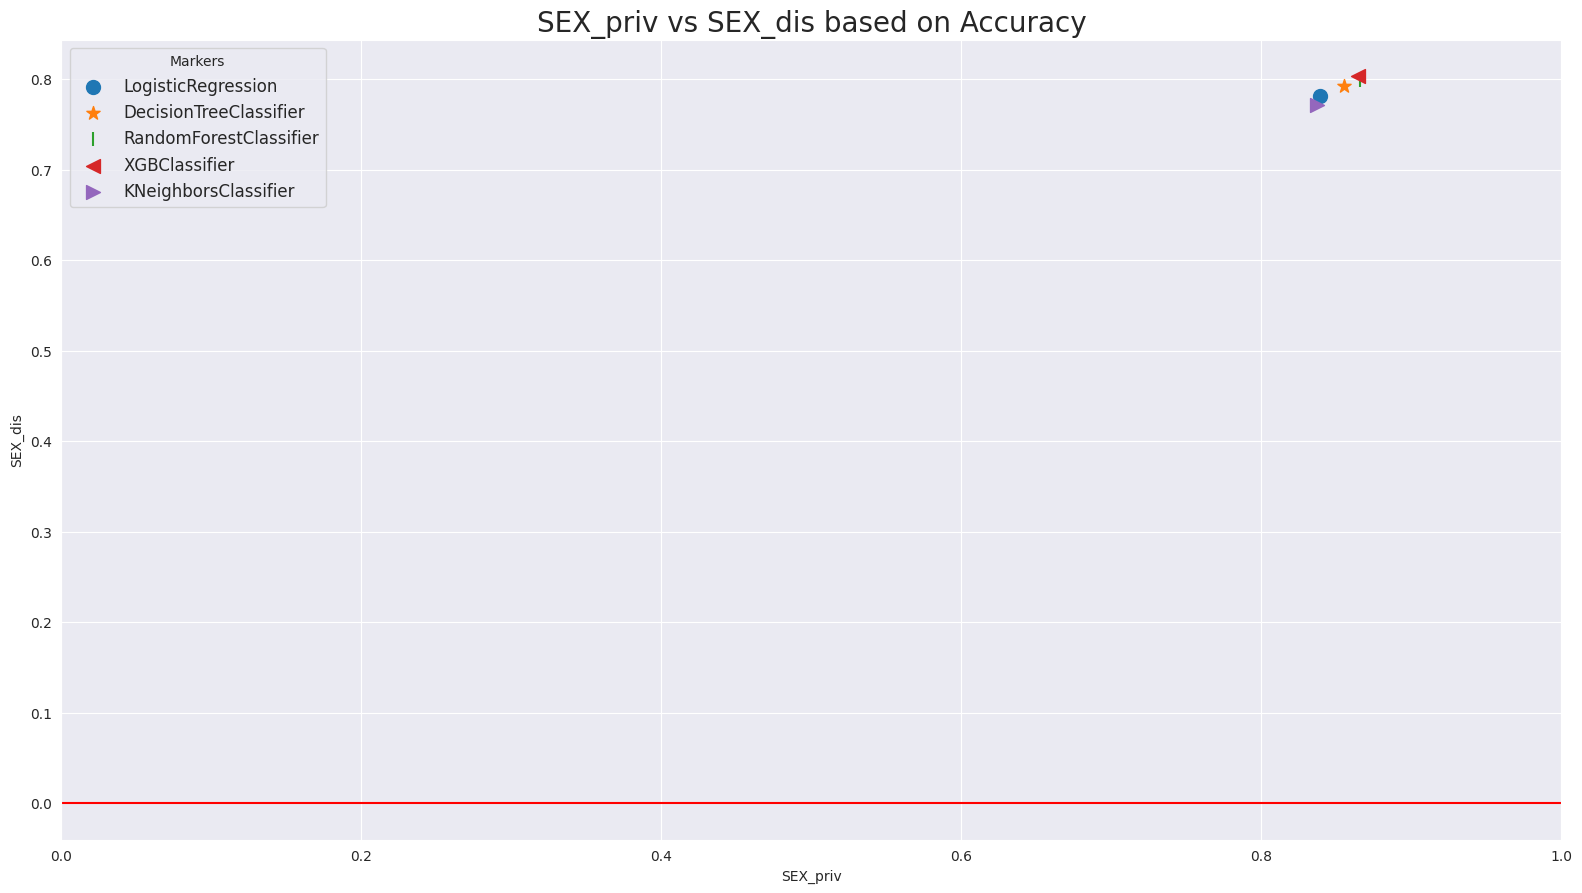

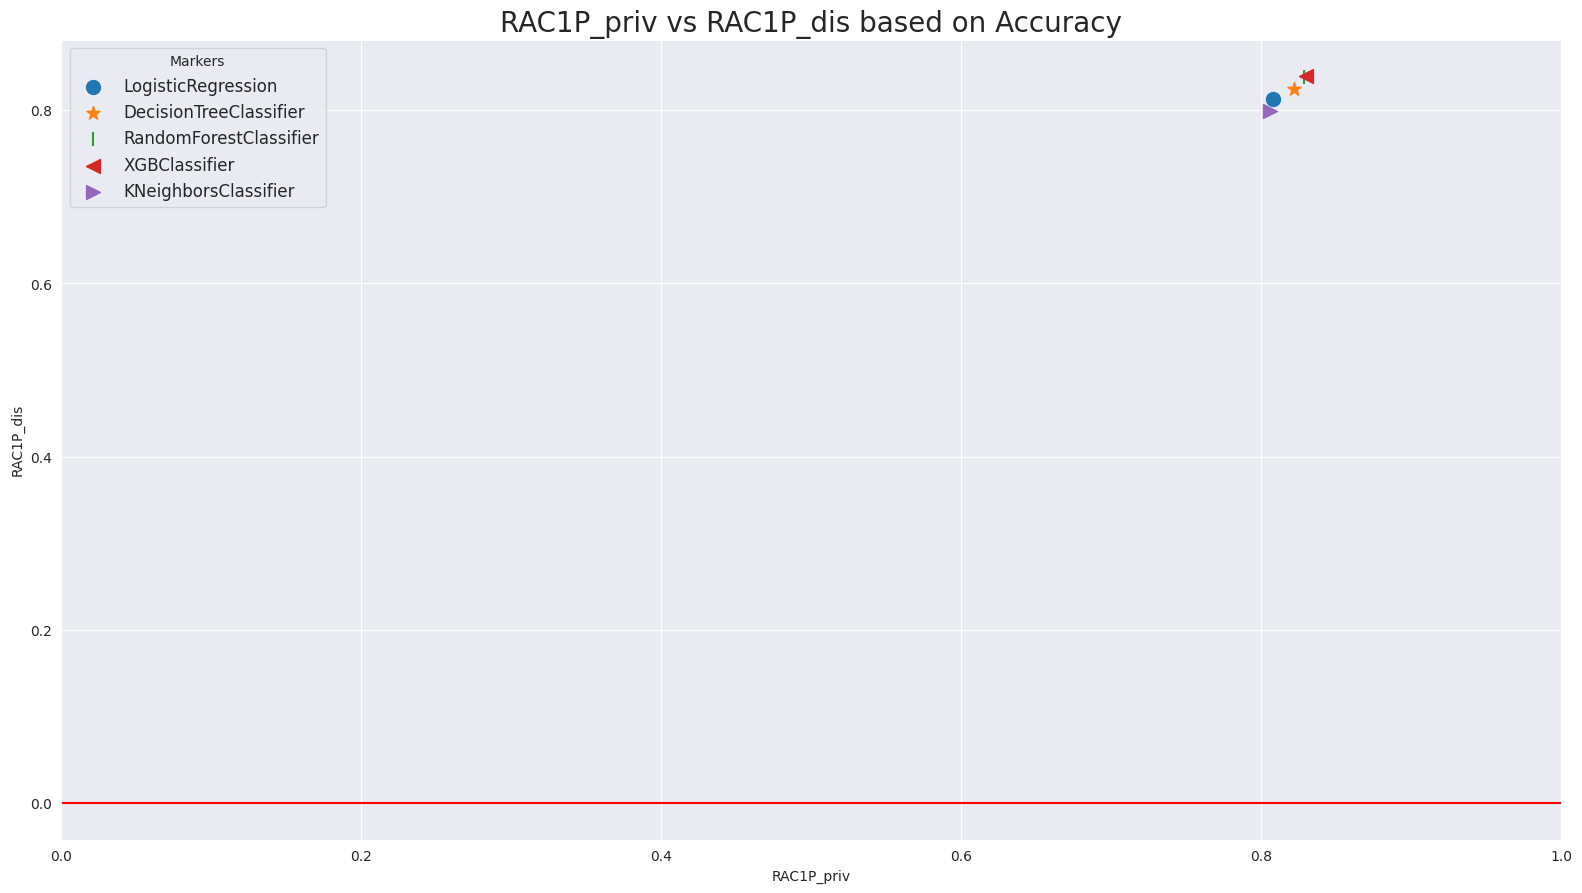

In [8]:
visualize_fairness_metrics_for_prediction_metric(models_average_results_dct, prediction_metric='Accuracy')